# Redes Neurais com Pytorch

Pytorch possibilita a criação de redes profundas com facilidade através do módulo 'nn'.

In [2]:
import numpy as np
import torch

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Vamos usar o MNIST para esse teste, porém vamos usar como uma lista de valores  e não como uma imagem (CNN)

In [4]:
from torchvision import datasets, transforms

In [5]:
# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [6]:
# definir a tranformação para normalizar os dados
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


In [7]:
# baixar o e caregar o dataset
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Batchs de tamanho 64, como definido anteriormente, com amostras escolhidas randomicamente.

[64, 1, 28, 28], 64 amostras, 1 canal, 28X28 é a dimensão 


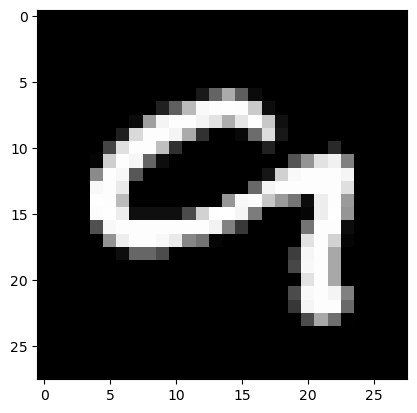

In [10]:
plt.imshow(images[1].numpy().squeeze() ,cmap='Greys_r')

## Implementação da rede

In [11]:
from torch import nn

In [19]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        #camadas
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear( 64, 10)
        
        # funções de ativação
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x
        

In [20]:
model = Network()

In [21]:
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
)

### Implementando mesma redo usando **torch.nn.functional**

In [22]:
import torch.nn.functional as F

In [23]:
class Network2(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        #camadas
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear( 64, 10)
        
        
        
    def forward(self, x):
        x = F.relu( self.hidden1(x))
        x = F.relu( self.hidden2(x))
        x = F.softmax( self.output(x))
        
        return x
        

In [24]:
model2 = Network2()
model2

Network2(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)